## Used the second convolve and changed number of filters to 64 

In [1]:
import os
os.getcwd()  # Get Working Directory

'C:\\Users\\rdeterman\\DroneCourse\\ENVS333\\DeepLearn\\final'

In [2]:
%%time
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
import tensorflow as tf
import pandas as pd

Using TensorFlow backend.


Wall time: 3.55 s


In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [4]:
# dimensions of our images.
img_width, img_height = 150, 150

In [5]:
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 350
nb_validation_samples = 100
epochs = 10
batch_size = 20

In [6]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255)

In [8]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

#where you can "augment" the data 
#rescale = normalize

In [9]:
#function that allows for indexing and labeling
#number and type of classes
#random generator
training = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',) #binary class not categorical 
                         #categorical 
x,y = training.next()  #x = input # y = output

Found 702 images belonging to 2 classes.


In [10]:
validation = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

x_valid,y_valid = validation.next()



Found 201 images belonging to 2 classes.


In [11]:
y_valid

array([0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 1.], dtype=float32)

In [12]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape)) #convoulution layer with 32 filters with filter size 3x3
model.add(Activation('relu')) #rectified linear unit vs. sigmoid function #//activation keras
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [14]:
history = model.fit_generator(
    training,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
17/17 [==============================] - 15s 887ms/step - loss: 0.6519 - accuracy: 0.6335 - val_loss: 0.5958 - val_accuracy: 0.6200
Epoch 2/10
17/17 [==============================] - 15s 897ms/step - loss: 0.5647 - accuracy: 0.6971 - val_loss: 0.4727 - val_accuracy: 0.7700
Epoch 3/10
17/17 [==============================] - 16s 955ms/step - loss: 0.4924 - accuracy: 0.7765 - val_loss: 0.4464 - val_accuracy: 0.8148
Epoch 4/10
17/17 [==============================] - 19s 1s/step - loss: 0.5039 - accuracy: 0.7826 - val_loss: 0.4484 - val_accuracy: 0.8000
Epoch 5/10
17/17 [==============================] - 18s 1s/step - loss: 0.4173 - accuracy: 0.8265 - val_loss: 0.6249 - val_accuracy: 0.6914
Epoch 6/10
17/17 [==============================] - 17s 1s/step - loss: 0.4510 - accuracy: 0.8168 - val_loss: 0.5327 - val_accuracy: 0.8200
Epoch 7/10
17/17 [==============================] - 18s 1s/step - loss: 0.4442 - accuracy: 0.7941 - val_loss: 0.3280 - val_accuracy: 0.8272
Epoch 8/10


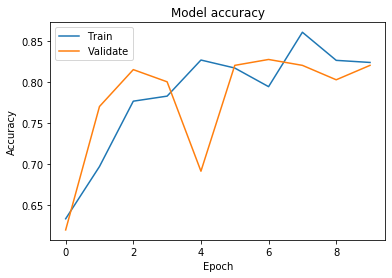

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [16]:
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

val = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    shuffle = False,
    class_mode='binary')

predictions = model.predict(val)

new_pred =  np.ravel(np.rint(predictions))

y = val.classes;

test = (new_pred-y)
for i in test:
    if i == 0:
        print('Correctly Classified')
    if i == 1:
        print('Incorrectly Classified Alligator as Turtle')
    if i == -1:
        print('Incorrectly Classified Turtle as Alligator')

Found 201 images belonging to 2 classes.
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Incorrectly Classified Alligator as Turtle
Correctly Classified
Correctly Classified
Correctly Classified
Incorrectly Classified Alligator as Turtle
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Classified
Correctly Cl

In [17]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [18]:
from tabulate import tabulate
print(tabulate([['Correctly Classified', sum(new_pred-y==0)],
['Incorrectly Classified Alligator as Turtle',sum(new_pred-y==1)],
['Incorrectly Classified Turtle as Alligator',sum(new_pred-y==-1)]],
headers=['Class', 'Number'],tablefmt='fancy_grid'))

print(tabulate([['Correctly Classified', (sum(new_pred-y==0))/len(new_pred-y)],
['Incorrectly Classified',((sum(new_pred-y==1))/len(new_pred-y))+(sum(new_pred-y==-1))/len(new_pred-y)]],  
headers=['Class', 'Fraction'],tablefmt='fancy_grid'))

╒════════════════════════════════════════════╤══════════╕
│ Class                                      │   Number │
╞════════════════════════════════════════════╪══════════╡
│ Correctly Classified                       │      162 │
├────────────────────────────────────────────┼──────────┤
│ Incorrectly Classified Alligator as Turtle │        4 │
├────────────────────────────────────────────┼──────────┤
│ Incorrectly Classified Turtle as Alligator │       35 │
╘════════════════════════════════════════════╧══════════╛
╒════════════════════════╤════════════╕
│ Class                  │   Fraction │
╞════════════════════════╪════════════╡
│ Correctly Classified   │    0.80597 │
├────────────────────────┼────────────┤
│ Incorrectly Classified │    0.19403 │
╘════════════════════════╧════════════╛


In [19]:
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [20]:
newpredictions =  np.rint(predictions)

In [21]:
newpredictions
#print(np.shape(newpredictions))
#print(np.shape(validation.classes))


array([[0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.00

Populating the interactive namespace from numpy and matplotlib
0.0
0.0
0.0
0.0
0.0


C:\Users\rdeterman\Anaconda3\envs\deeplearn\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


0.0


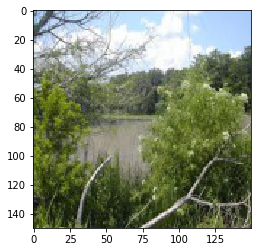

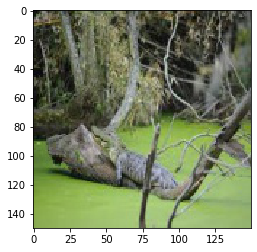

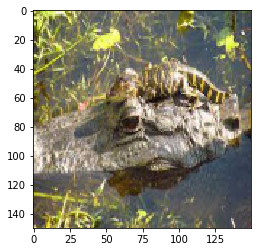

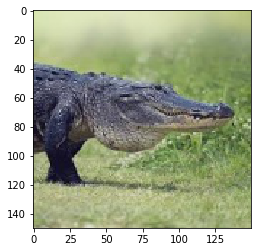

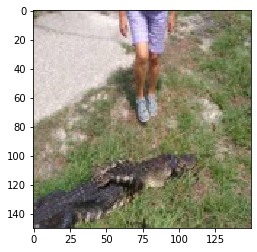

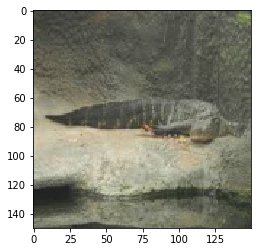

In [22]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

index = [0,1,2,3,4,5]
for i in index:
    figure()
    img=mpimg.imread(val.filepaths[i])
    imgplot = plt.imshow(img)
    print(new_pred[i])


1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


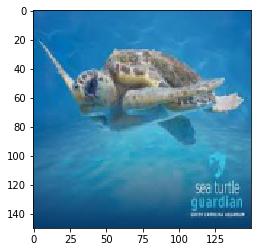

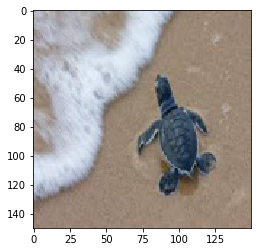

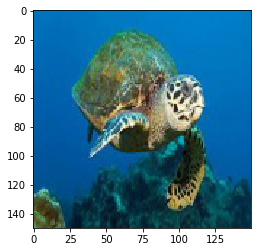

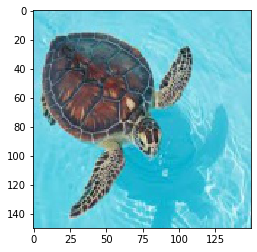

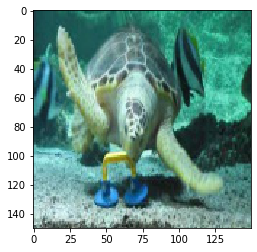

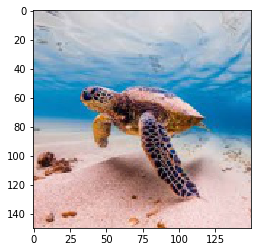

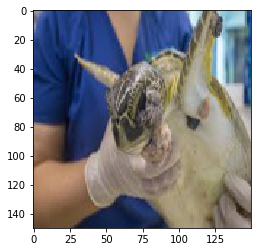

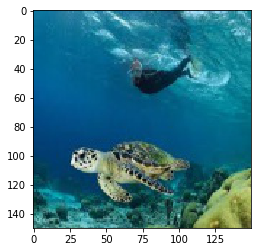

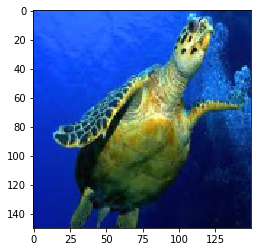

In [23]:
index = [150, 151, 152, 153, 154, 155, 156, 157, 158]

for i in index:
    figure()
    img=mpimg.imread(validation.filepaths[i])
    imgplot = plt.imshow(img)
    print(new_pred[i])